In [1]:
import pandas as pd
import os
import subprocess
import zipfile
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as st
import pymc3  as pm
import seaborn as sns
import arviz as az
from sklearn.preprocessing import scale
from matplotlib import rcParams
from scipy import interpolate
import matplotlib.cm as cm


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
wave = np.array([412,443,488,531,547,555,667,678])
λ = np.array([412, 443, 469, 488, 531, 547, 555, 645, 667, 678], dtype=np.int32)
F0 = np.array([1729.12    , 1876.22    , 2058.78    , 1949.33    , 1857.47    ,
       1865.39    , 1838.6901  , 1578.1101  , 1522.55    , 1480.52    ,
       1280.65    ,  971.74005 ,  958.24    ,  454.66998 ,  239.76999 ,
         98.850006], dtype=np.float32)
F0i = interpolate.interp1d(λ, F0[:10])(wave).T

In [3]:
ndata = len(wave)
Lt_names = ['Lt_%d' % wv for wv in wave]
Lr_names = ['Lr_%d' % wv for wv in wave]
La_names = ['La_%d' % wv for wv in wave]
TLg_names = ['TLg_%d' % wv for wv in wave]
tLf_names = ['tLf_%d' % wv for wv in wave]
polcor_names = ['polcor_%d' % wv for wv in wave]
brdf_names = ['brdf_%d' % wv for wv in wave]
Rrs_mob_names = ['Rrs_mob_%d' % wv for wv in wave]
Rrs_aqua_names = ['Rrs_aqua_%d' % wv for wv in wave]

chl_names = ['chlor_a_%d' % wv for wv in wave]
relaz_names = ['relaz_%d' % wv for wv in wave]
scat_names = ['scattang_%d' % wv for wv in wave]
glint_names = ['glint_coef_%d' % wv for wv in wave]

Lw_names = ['Lw_%d' % wv for wv in wave]
tg_sol_names = ['tg_sol_%d' % wv for wv in wave]
tg_sen_names = ['tg_sen_%d' % wv for wv in wave]
aot_names = ['aot_%d' % wv for wv in wave]

tsol_names = ['t_sol_%d' % wv for wv in wave]
tsen_names = ['t_sen_%d' % wv for wv in wave]
water_vapor_names = ['water_vapor_%d' % wv for wv in wave]
solz_names = ['solz_%d' % wv for wv in wave]
senz_names = ['senz_%d' % wv for wv in wave]
angstrom_names = ['angstrom_%d' % wv for wv in wave]
epsilon_names = ['epsilon_%d' % wv for wv in wave]
windspeed_names = ['windspeed_%d' % wv for wv in wave]
humidity_names = ['humidity_%d' % wv for wv in wave]
pressure_names = ['pressure_%d' % wv for wv in wave]
ozone_names = ['ozone_%d' % wv for wv in wave]
rhot_names = ['rhot_%d' % wv for wv in wave]

In [4]:
df = np.load('moby_df', allow_pickle=True)

In [5]:
ndf = df.dropna()
μ0 = np.cos(np.deg2rad(ndf[solz_names])).values 
μ = np.cos(np.deg2rad(ndf[senz_names])).values 

# ndf[Lt_names] = np.atleast_2d(fsol.values).T*ndf[Lt_names]
# ndf[Lr_names] = np.atleast_2d(fsol.values).T*ndf[Lr_names]
# ndf[La_names] = np.atleast_2d(fsol.values).T*ndf[La_names]
# ndf[TLg_names] = np.atleast_2d(fsol.values).T*ndf[TLg_names]
# ndf[tLf_names] = np.atleast_2d(fsol.values).T*ndf[tLf_names]

# ndf[Lt_names] = ndf[Lt_names]/μ0/F0i
# ndf[Lr_names] = ndf[Lr_names]/μ0/F0i
# ndf[La_names] = ndf[La_names]/μ0/F0i
# ndf[TLg_names] = ndf[TLg_names]/μ0/F0i
# ndf[tLf_names] = ndf[tLf_names]/μ0/F0i

airmass = 1/μ0 + 1/μ
ndf[water_vapor_names] = airmass*ndf[water_vapor_names]
ndf[ozone_names] = airmass*ndf[ozone_names]

dfn = (ndf - ndf.mean())/ndf.std()


/accounts/aibrahi2/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
indx = np.arange(0,len(wave))

with pm.Model() as pooled_model_ST_MLR:
#     hyp_α_sd = pm.HalfCauchy('hyp_α_sd', 1)
#     hyp_β_sd = pm.HalfCauchy('hyp_β_sd', 1)

    hyp_β_sd = .5
    hyp_α_sd = 1.0
    
    # Independent parameters for each county
    α = pm.Normal('α', 0, sd=hyp_α_sd, shape=ndata)
    β0 = pm.Normal('β0', 1, sd=hyp_β_sd, shape=ndata)
    β1 = pm.Normal('β1', 0, sd=hyp_β_sd, shape=ndata)
    β2 = pm.Normal('β2', 0, sd=hyp_β_sd, shape=ndata)
    β3 = pm.Normal('β3', 0, sd=hyp_β_sd, shape=ndata)
    β4 = pm.Normal('β4', 0, sd=hyp_β_sd, shape=ndata)
    β5 = pm.Normal('β5', 0, sd=hyp_β_sd, shape=ndata)
    β6 = pm.Normal('β6', 0, sd=hyp_β_sd, shape=ndata)
    β7 = pm.Normal('β7', 0, sd=hyp_β_sd, shape=ndata)
    β8 = pm.Normal('β8', 0, sd=hyp_β_sd, shape=ndata)
    β9 = pm.Normal('β9', 0, sd=hyp_β_sd, shape=ndata)
    β10 = pm.Normal('β10', 0, sd=hyp_β_sd, shape=ndata)
    β11 = pm.Normal('β11', 0, sd=hyp_β_sd, shape=ndata)
    β12 = pm.Normal('β12', 0, sd=hyp_β_sd, shape=ndata)
    β13 = pm.Normal('β13', 0, sd=hyp_β_sd, shape=ndata)
    β14 = pm.Normal('β14', 0, sd=hyp_β_sd, shape=ndata)
    β15 = pm.Normal('β15', 0, sd=hyp_β_sd, shape=ndata)
    β16 = pm.Normal('β16', 0, sd=hyp_β_sd, shape=ndata)
    β17 = pm.Normal('β17', 0, sd=hyp_β_sd, shape=ndata)
    β18 = pm.Normal('β18', 0, sd=hyp_β_sd, shape=ndata)
    β19 = pm.Normal('β19', 0, sd=hyp_β_sd, shape=ndata)    
    
    # Model DOF
    ν = pm.Exponential('ν', 1/30)

    # Model error
    σ = pm.HalfCauchy('σ', 1)
    
    Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[brdf_names]  +\
               β2[indx]*dfn[windspeed_names] + β3[indx]*dfn[glint_names] +\
               β4[indx]*dfn[solz_names]  + β5[indx]*dfn[senz_names] +\
               β6[indx]*dfn[relaz_names] + β7[indx]*dfn[windspeed_names] +\
               β8[indx]*dfn[water_vapor_names]+ β9[indx]*dfn[humidity_names] +\
               β10[indx]*dfn[pressure_names] + β11[indx]*dfn[ozone_names] +\
               β12[indx]*dfn[angstrom_names] + β13[indx]*dfn[epsilon_names] +\
               β14[indx]*dfn[aot_names] + β15[indx]*dfn[polcor_names] +\
               β16[indx]*dfn[Lr_names] +  β17[indx]*dfn[La_names] +\
               β18[indx]*dfn[tLf_names]+ β19[indx]*dfn[TLg_names]
#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[solz_names]  +\
#                β2[indx]*dfn[senz_names] + β3[indx]*dfn[relaz_names]
    
#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[windspeed_names]  +\
#                β2[indx]*dfn[water_vapor_names] + β3[indx]*dfn[humidity_names] +\
#                β4[indx]*dfn[pressure_names] + β5[indx]*dfn[ozone_names]

#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[angstrom_names]  +\
#                β2[indx]*dfn[epsilon_names] + β3[indx]*dfn[aot_names]+ β4[indx]*dfn[polcor_names]

#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[Lr_names]  +\
#                β2[indx]*dfn[La_names] + β3[indx]*dfn[tLf_names]+ β4[indx]*dfn[TLg_names]

#     Rrs_est = α[indx] + β0[indx]*dfn[Rrs_mob_names] + β1[indx]*dfn[tsol_names]  +\
#                β2[indx]*dfn[tsen_names] + β3[indx]*dfn[tg_sol_names]+ β4[indx]*dfn[tg_sen_names]


    # Data likelihood
    likelihood = pm.StudentT('Rrs_est', mu=Rrs_est, sd=σ, nu=ν, observed=dfn[Rrs_aqua_names])
    
with pooled_model_ST_MLR:
    trace_hc_mlr = pm.sample(1000,tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, ν, β19, β18, β17, β16, β15, β14, β13, β12, β11, β10, β9, β8, β7, β6, β5, β4, β3, β2, β1, β0, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [03:19<00:00, 30.14draws/s]


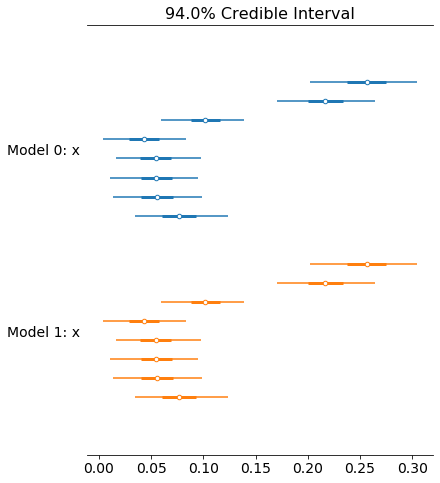

In [23]:
ax = az.plot_forest([np.flipud(trace_hc_mlr['β0'].T), np.flipud(trace_hc_mlr['β0'].T)])
